<a href="https://colab.research.google.com/github/Gengsu07/ML_DICODING/blob/main/TF_styleTransfer_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
import numpy as np

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Buat Function untuk convert image->tensor dan tensor->image

In [15]:
def tensor_to_img(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype = np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

model yang akan kita pakai dari tensorflow hub juga menerima masukan berupa tensor. Sehingga kita harus mengubah gambar yang akan kita pakai menjadi tensor terlebih dahulu

In [16]:
def img_to_tensor(path_img):
    img = tf.io.read_file(path_img)
    img = tf.image.decode_image(img, channels=3, dtype=tf.float32)

        # Resize the image to specific dimensions
    img = tf.image.resize(img, [512, 512])
    # img = tf.cast(img*255, tf.uint8)
    img = img[tf.newaxis,:]
    return img

### Input image apa saja untuk dikombinasikan

In [17]:
djp_tensor = img_to_tensor('/content/drive/MyDrive/DATASET/djp.jpg')
style_tensor = img_to_tensor('/content/drive/MyDrive/DATASET/smoke_sky.jpg')

Terakhir, jalankan kode di bawah untuk melakukan style transfer pada gambar kita dan menampilkan hasilnya.

In [18]:
import tensorflow_hub as hub
import PIL.Image
import time
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')

In [19]:
styled_image = hub_module(tf.constant(djp_tensor), tf.constant(style_tensor))[0]

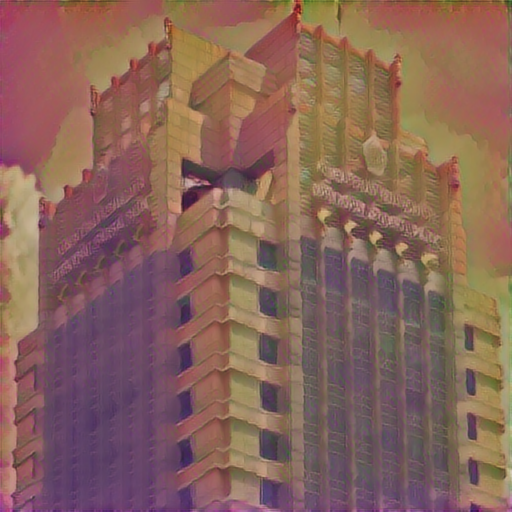

In [20]:
tensor_to_img(styled_image)

AMAZING!!!